In [16]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

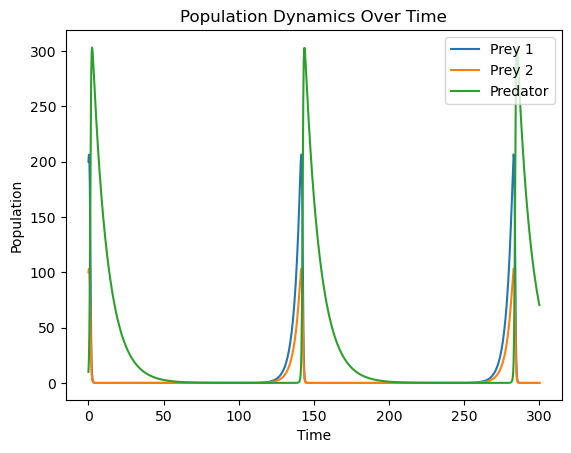

In [31]:
# Model 1: 1 predator, 2 prey without carrying capacity

# x1 = population density of prey 1
# x2 = population density for prey 2
# y = population density of predator

a1 = 0.25 # prey 1 growth rate
a2 = 0.25 #prey 2 growth rate
b = 0.01 # predator kill rate
c = 0.1 # predator death rate
d1 = 0.01 # predator growth rate from eating prey 1
d2 = 0.005 #predator growth rate from eating prey 2

# defining the Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y = S
    return [a1*x1 - b*x1*y,
            a2*x2 - b*x2*y,
            -c*y + d1*x1*y +d2*x2*y 
           ]


x10 = 200 # initial prey 1 population
x20 = 100 #initial prey 2 population
y0 = 10 # initial predator populations
S0 = (x10, x20, y0)

t = np.linspace(0, 300, 1000) # time array

sol1 = odeint(dSdt, S0, t) # solving differential equations

sol_x1 = sol1[:, 0] # prey population over time
sol_x2 = sol1[:, 1] # prey population over time
sol_y1 = sol1[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol_x1, label = "Prey 1")
plt.plot(t, sol_x2, label = "Prey 2")
plt.plot(t, sol_y1, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

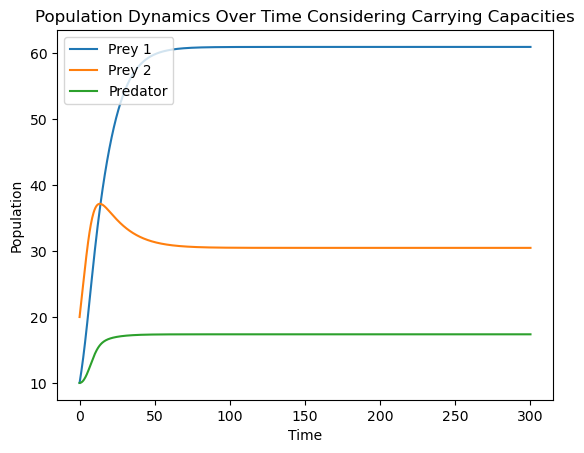

In [32]:
# Model 2: 1 predator, 1 prey with carrying capacity

# carrying capacity of an environment = the maximum population size of a biological species that can be 
# sustained by that specific environment, given the food, habitat, water, and other resources available (Wikipedia)

k1 = 200 # carrying capacity of prey 1 population
k2 = 20 # carrying capacity of predator population
k3 = 100 # carrying capacity of prey 2 population

def dSdt(S, t):
    x1, x2, y = S
    return [a1*x1*(1-x1/k1) - b*x1*y,
            a2*x2*(1-x2/k3) - b*x2*y,
            -c*y + d1*x1*y*(1-y/k2) + d2*x2*y*(1-y/k2)#using geometric mean of x1 and x2
           ]

x10 = 10 # initial prey 1 population
x20 = 20 # initial prey 2 population
y0 = 10 # initial predator populations
S0 = (x10, x20, y0)

t = np.linspace(0, 300, 1000) # time array

sol2 = odeint(dSdt, S0, t) # solving differential equations

sol_x21 = sol2[:, 0] # prey population over time
sol_x22 = sol2[:, 1] # prey population over time
sol_y2 = sol2[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol_x21, label = "Prey 1")
plt.plot(t, sol_x22, label = "Prey 2")
plt.plot(t, sol_y2, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time Considering Carrying Capacities")
plt.show()